In [3]:
# 게임룰
#  승 : 동전 앞면/ 패 : 동전 뒷면
#  Terminate : s = 0 or s = 100
#  action = [1, 2, 3, ..., min(s, 100 - s)]
#  gamma = 1
#  R = 0 until Terminate/ 1 승리
#  v(s) : 이길 확률
#  p = 0.4 : 동전 앞면 나올 확률
#  value iteration을 사용할 것
'''
/*******************************************************************************
* Copyright juhyeong lee
*******************************************************************************/
'''

In [8]:
# state 생성
states = [0] * 99
for i in range(1,100):
  states[i-1] = i
print(states)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [9]:
# state에 따른 actions 생성. (단, 함수 사용전에 a = []으로 초기화 매번 해줘야함.)
def CreateAction(s,a):
  for i in range(1,min(s, 100-s) + 1):
    a.append(i)

# CreateAction함수 테스트
'''
a = []
s = 51
CreateAction(s,a)
print(a)
'''

# s, a에 따른 s'생성
def CreateSprime(s,a,s_prime):
  s_prime.append(s + a)
  s_prime.append(s - a)

'''
s_primes = []
CreateSprime(21, 21, s_primes)
print(s_primes)
'''


# R 정의
def Reward(s_prime):
  if(s_prime == 100):
    return 1
  else:
    return 0



# P 정의
def P(s,a,s_prime):
  if(s_prime == s + a):
    return 0.4
  else:
    return 0.6


# 최고값 원소의 순서 출력 함수 정의
def MaxList(q):
  maxList = 0
  maxVal = 0
  size = len(q)
  for i in range(0,size):
    if(q[i] > maxVal):
      maxList = i
      maxVal = q[i]
  return maxList
'''
q = [9, 2, 3, 5, 2, 11]
MaxList(q)
'''

'\nq = [9, 2, 3, 5, 2, 11]\nMaxList(q)\n'

In [10]:
# value iteration(1)

# 0~100 states에 대한 state-value, OptimalPolicy 초기화
v = [0] * 101
optPolicy = [0] * 101
for _ in range(50):
  for s in states:
    #print('s = ', s)
    # 가능한 action 생성
    actions = []
    CreateAction(s, actions)
    #print('actions = ', actions)
    
    # q(s,a)를 a마다 만들고 이를 배열로 저장하기 위한 q 초기화
    q = []
    
    # 가능한 s' 생성 후 s에 대한 value Iteration진행
    for a in actions:
      s_primes = []
      CreateSprime(s, a, s_primes)
      q.append(sum(P(s, a, s_prime)*(Reward(s_prime) + v[s_prime]) for s_prime in s_primes))
      #print('q = ', q)
    v[s] = max(q)
    optPolicy[s] = MaxList(q) + 1
  
    # 문제점 : 마지막 a에 대한 s'만이 저장된다.
    # 해결책 : q-value를 따로 만들어서 배열에 a에 따른 q값을 저장하고 각 s에서 max(q배열)을 구한다.

print(v)
print(optPolicy)  

[0, 0.0020656247765443165, 0.005164061941360791, 0.009225471067793893, 0.012910154853401976, 0.017385398981324286, 0.02306367766948473, 0.02781411305627054, 0.03227538713350494, 0.03768507279536644, 0.04346349745331071, 0.05035446998069344, 0.05765919417371182, 0.06523937486592661, 0.06953528264067635, 0.07443123938879459, 0.08068846783376235, 0.08661104367721989, 0.09421268198841609, 0.10314362491955598, 0.10865874363327677, 0.11596662620633194, 0.1258861749517336, 0.13357997572379918, 0.14414798543427954, 0.16000000000000003, 0.1630984371648165, 0.1677460929120412, 0.17383820660169086, 0.17936523228010298, 0.18607809847198648, 0.19459551650422713, 0.20172116958440586, 0.20841308070025744, 0.2165276091930497, 0.2251952461799661, 0.2355317049710402, 0.24648879126056775, 0.25785906229888994, 0.26430292396101457, 0.2716468590831919, 0.28103270175064354, 0.28991656551582984, 0.30131902298262414, 0.314715437379334, 0.3229881154499152, 0.3339499393094979, 0.34882926242760043, 0.360369963585

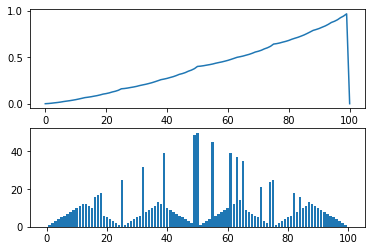

In [11]:
# 그래프그리기
import matplotlib.pyplot as plt
'''plt.plot(v)
plt.plot(optPolicy)
'''
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = range(0, 101)
y1 = v
y2 = optPolicy
ax1.plot(x, y1)
ax2.bar(x, y2)

plt.show()